In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/My Drive/Machine Learning Project/Movie_data.csv')

In [ ]:
data.shape

(5043, 28)

# Data Cleaning

Removing Duplicates

In [ ]:
data_unique = data.drop_duplicates(subset=['movie_title', 'title_year'], keep='first').copy()
data_unique.shape


(4919, 28)

In [ ]:
data_unique.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       485
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [ ]:
data_unique.dropna(subset=['gross'], how='any', inplace=True)
data_unique.isnull().sum()

color                          2
director_name                  2
num_critic_for_reviews         3
duration                       2
director_facebook_likes        2
actor_3_facebook_likes        13
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                64
budget                       266
title_year                     2
actor_2_facebook_likes         6
imdb_score                     0
aspect_ratio                 104
movie_facebook_likes           0
dtype: int64

In [ ]:
median_budget_per_year = data_unique.groupby('title_year')['budget'].transform('median')
print(median_budget_per_year)
data_unique['budget'].fillna(median_budget_per_year, inplace=True)

0       23600000.0
1       20000000.0
2       30000000.0
3       25000000.0
5       25000000.0
           ...    
5034    28000000.0
5035    25000000.0
5037    30000000.0
5041    25000000.0
5042    26000000.0
Name: budget, Length: 4056, dtype: float64


In [ ]:
data_unique.head(59)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [ ]:
data_unique.isnull().sum()

color                          2
director_name                  2
num_critic_for_reviews         3
duration                       2
director_facebook_likes        2
actor_3_facebook_likes        13
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                64
budget                         3
title_year                     2
actor_2_facebook_likes         6
imdb_score                     0
aspect_ratio                 104
movie_facebook_likes           0
dtype: int64

In [ ]:
data_unique.fillna(0, inplace=True)  # Fill rest of missing data
data_unique = data_unique[data_unique['title_year'] != 0]  # Deleting rows where title_year = 0
data_unique = data_unique[data_unique['country'] == 'USA']  # Budgets are in respective country currency, so we will drop it
data_unique.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
data_unique.shape

(3154, 28)

# Data Understanding

gross                        1.000000
budget                       0.643383
num_voted_users              0.641340
num_user_for_reviews         0.556798
num_critic_for_reviews       0.490599
movie_facebook_likes         0.377839
duration                     0.287811
actor_3_facebook_likes       0.278116
imdb_score                   0.263086
actor_2_facebook_likes       0.235691
cast_total_facebook_likes    0.215555
director_facebook_likes      0.139295
actor_1_facebook_likes       0.132503
aspect_ratio                 0.130203
title_year                   0.029693
facenumber_in_poster        -0.033651
Name: gross, dtype: float64

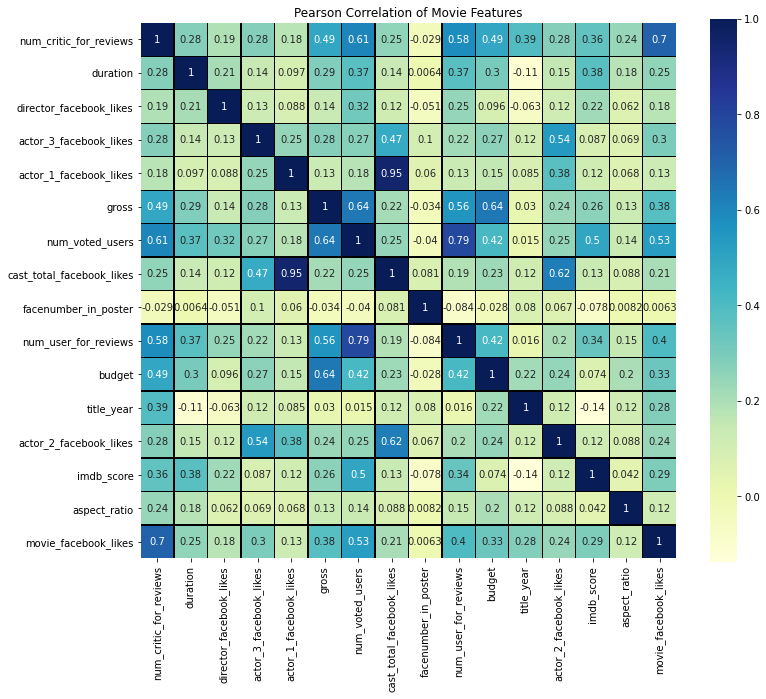

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')

# Draw the heatmap using seaborn
sns.heatmap(data_unique.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

#  The heat map depicting a diagonal coordination indicated there may be a correlation in the data

#  To show corellation polarity values with the 'gross'
data_unique.corr()['gross'].sort_values(ascending=False)  

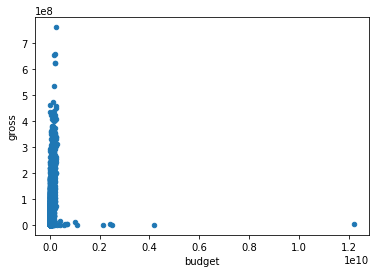

In [ ]:
data.plot.scatter(x='budget', y='gross')

Text(0, 0.5, 'Gross (in million)')

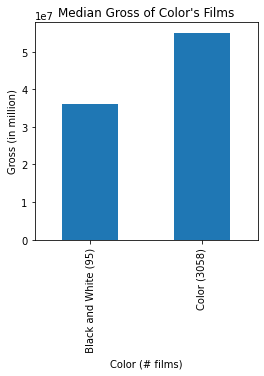

In [ ]:
fig = plt.figure(figsize=(4,4))
comparison_df = data_unique.groupby('color', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_unique['color'].value_counts().to_dict()
comparison_df['films'] = comparison_df['color'].map(name_count_key)

comparison_df['color'] = comparison_df['color'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['color', 'gross']][10::-1].set_index('color').iloc[:,0].plot(kind='bar')
plt.legend().set_visible(False)
plt.title("Median Gross of Color's Films")
plt.xlabel("Color (# films)")
plt.ylabel("Gross (in million)")

Text(0.5, 0, 'Gross (in million)')

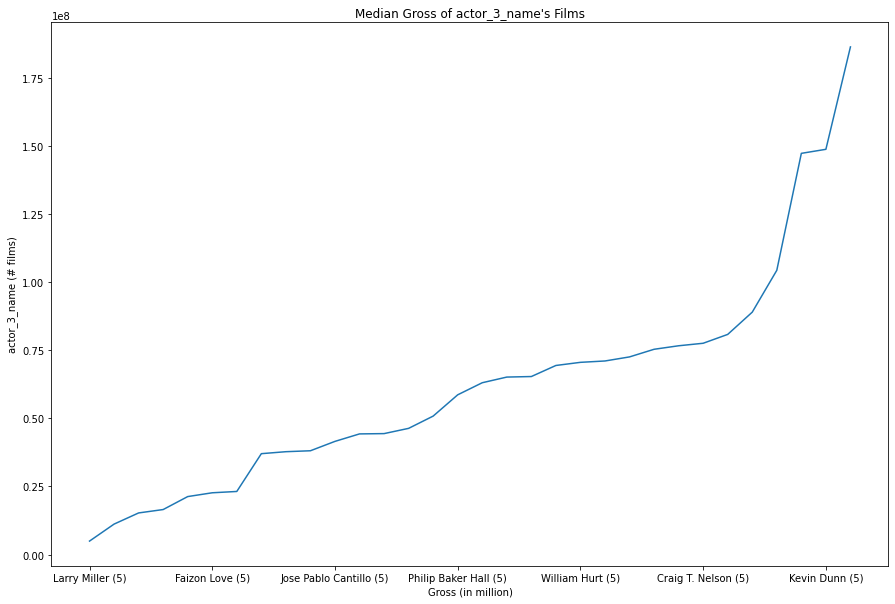

In [ ]:
fig = plt.figure(figsize=(15,10))
comparison_df = data_unique.groupby('actor_3_name', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_unique['actor_3_name'].value_counts().to_dict()
comparison_df['films'] = comparison_df['actor_3_name'].map(name_count_key)

comparison_df['actor_3_name'] = comparison_df['actor_3_name'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['actor_3_name', 'gross']][::-1].set_index('actor_3_name').iloc[:,0].plot(kind='line')
plt.legend().set_visible(False)
plt.title("Median Gross of actor_3_name's Films")
plt.ylabel("actor_3_name (# films)")
plt.xlabel("Gross (in million)")

Text(0, 0.5, 'Gross (in million)')

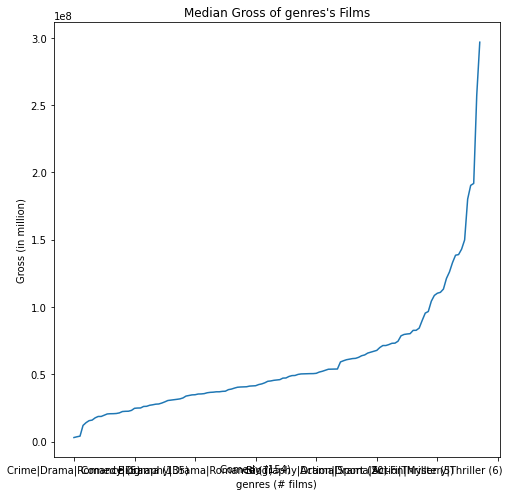

In [ ]:
fig = plt.figure(figsize=(8,8))
comparison_df = data_unique.groupby('genres', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_unique['genres'].value_counts().to_dict()
comparison_df['films'] = comparison_df['genres'].map(name_count_key)

comparison_df['genres'] = comparison_df['genres'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['genres', 'gross']][::-1].set_index('genres').iloc[:,0].plot(kind='line')
plt.legend().set_visible(False)
plt.title("Median Gross of genres's Films")
plt.xlabel("genres (# films)")
plt.ylabel("Gross (in million)")

Text(0, 0.5, 'Gross (in million)')

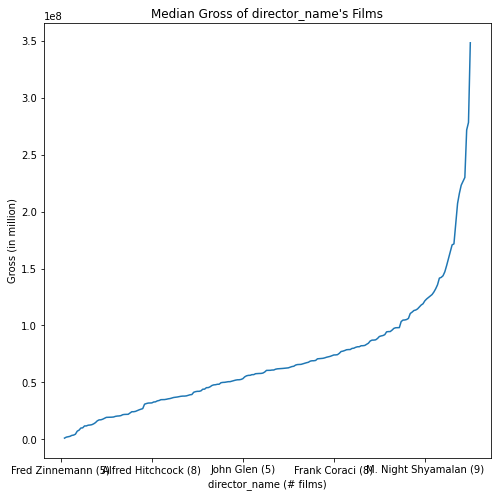

In [ ]:
fig = plt.figure(figsize=(8,8))
comparison_df = data.groupby('director_name', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data['director_name'].value_counts().to_dict()
comparison_df['films'] = comparison_df['director_name'].map(name_count_key)

comparison_df['director_name'] = comparison_df['director_name'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['director_name', 'gross']][::-1].set_index('director_name').iloc[:,0].plot(kind='line')
plt.legend().set_visible(False)
plt.title("Median Gross of director_name's Films")
plt.xlabel("director_name (# films)")
plt.ylabel("Gross (in million)")

Text(0.5, 0, 'Gross (in million)')

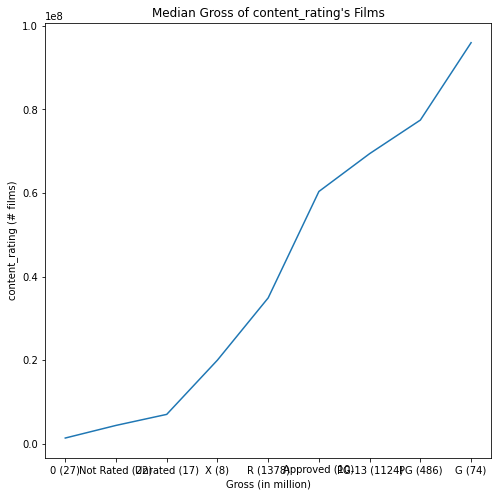

In [ ]:
fig = plt.figure(figsize=(8,8))
comparison_df = data_unique.groupby('content_rating', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_unique['content_rating'].value_counts().to_dict()
comparison_df['films'] = comparison_df['content_rating'].map(name_count_key)

comparison_df['content_rating'] = comparison_df['content_rating'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['content_rating', 'gross']][::-1].set_index('content_rating').iloc[:,0].plot(kind='line')
plt.legend().set_visible(False)
plt.title("Median Gross of content_rating's Films")
plt.ylabel("content_rating (# films)")
plt.xlabel("Gross (in million)")

Text(0, 0.5, 'Gross (in million)')

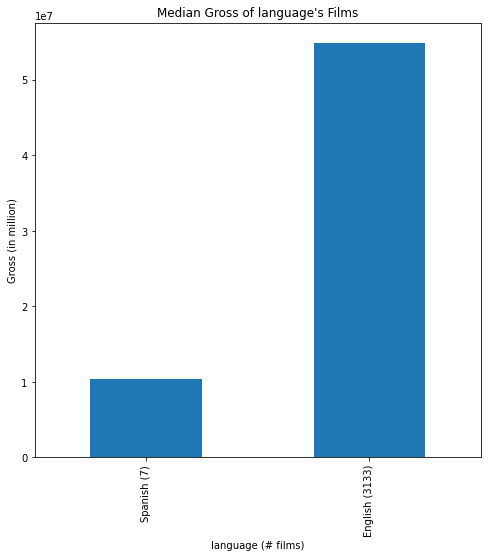

In [ ]:
fig = plt.figure(figsize=(8,8))
comparison_df = data_unique.groupby('language', as_index=False).mean().sort_values('gross', ascending=False)

name_count_key = data_unique['language'].value_counts().to_dict()
comparison_df['films'] = comparison_df['language'].map(name_count_key)

comparison_df['language'] = comparison_df['language'].map(str) + " (" + comparison_df['films'].astype(str) + ")"

comparison_df[comparison_df['films'] >= 5][['language', 'gross']][::-1].set_index('language').iloc[:,0].plot(kind='bar')
#data.plot.scatter(x='country', y='gross')
plt.legend().set_visible(False)
plt.title("Median Gross of language's Films")
plt.xlabel("language (# films)")
plt.ylabel("Gross (in million)")

Removing Columns

In [ ]:
data_unique.drop(["color", "director_facebook_likes", "actor_1_facebook_likes", "movie_title", "actor_3_name", "cast_total_facebook_likes", "facenumber_in_poster", "plot_keywords", "movie_imdb_link", "language", "country", "title_year", "actor_2_facebook_likes", "aspect_ratio"], axis = 1, inplace = True)

In [ ]:
data_unique.shape

(3154, 14)

# Encoding

Label encoding

In [ ]:
data_labeled_encoding = data_unique.copy()
data_labeled_encoding['content_rating'] = data_labeled_encoding['content_rating'].astype('category')
data_labeled_encoding['content_rating'] = data_labeled_encoding['content_rating'].cat.codes 
data_labeled_encoding.shape

(3154, 14)

One-hot Encoding

In [ ]:
data_onehot_encoding = pd.get_dummies(data_labeled_encoding, columns=['director_name', 'actor_1_name', 'actor_2_name', 'genres'], prefix = ['director_name', 'actor_1_name', 'actor_2_name', 'genres'])
data_onehot_encoding.shape


(3154, 5333)

In [ ]:
data_onehot_encoding

,num_critic_for_reviews,duration,actor_3_facebook_likes,gross,num_voted_users,num_user_for_reviews,content_rating,budget,imdb_score,movie_facebook_likes,director_name_Aaron Schneider,director_name_Aaron Seltzer,director_name_Abel Ferrara,director_name_Adam Carolla,director_name_Adam Goldberg,director_name_Adam Marcus,director_name_Adam McKay,director_name_Adam Rapp,director_name_Adam Rifkin,director_name_Adam Shankman,director_name_Adrian Lyne,director_name_Adrienne Shelly,director_name_Agnieszka Holland,director_name_Agnieszka Wojtowicz-Vosloo,director_name_Akiva Goldsman,director_name_Akiva Schaffer,director_name_Alan Cohn,director_name_Alan J. Pakula,director_name_Alan Metter,director_name_Alan Parker,director_name_Alan Poul,director_name_Alan Rudolph,director_name_Alan Shapiro,director_name_Alan Taylor,director_name_Albert Brooks,director_name_Albert Hughes,director_name_Alejandro Agresti,director_name_Alejandro Amenábar,director_name_Alejandro G. Iñárritu,director_name_Alejandro Monteverde,...,genres_Drama|Sport,genres_Drama|Thriller,genres_Drama|Thriller|War,genres_Drama|War,genres_Drama|Western,genres_Family|Fantasy|Music,genres_Family|Music|Romance,genres_Family|Sci-Fi,genres_Fantasy,genres_Fantasy|Horror,genres_Fantasy|Horror|Mystery,genres_Fantasy|Horror|Mystery|Romance,genres_Fantasy|Horror|Mystery|Thriller,genres_Fantasy|Horror|Romance,genres_Fantasy|Horror|Romance|Thriller,genres_Fantasy|Horror|Sci-Fi,genres_Fantasy|Horror|Thriller,genres_Fantasy|Mystery|Romance|Sci-Fi|Thriller,genres_Fantasy|Romance,genres_Horror,genres_Horror|Musical|Sci-Fi,genres_Horror|Mystery,genres_Horror|Mystery|Sci-Fi,genres_Horror|Mystery|Sci-Fi|Thriller,genres_Horror|Mystery|Thriller,genres_Horror|Sci-Fi,genres_Horror|Sci-Fi|Thriller,genres_Horror|Thriller,genres_Music,genres_Musical,genres_Musical|Romance,genres_Mystery|Romance|Thriller,genres_Mystery|Sci-Fi|Thriller,genres_Mystery|Thriller,genres_Romance,genres_Romance|Sci-Fi|Thriller,genres_Sci-Fi,genres_Sci-Fi|Thriller,genres_Thriller,genres_Western
0,723.0,178.0,855.0,760505847.0,886204,3054.0,7,237000000.0,7.9,33000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,1000.0,309404152.0,471220,1238.0,7,300000000.0,7.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,23000.0,448130642.0,1144337,2701.0,7,250000000.0,8.5,164000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,462.0,132.0,530.0,73058679.0,212204,738.0,7,263700000.0,6.6,24000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,392.0,156.0,4000.0,336530303.0,383056,1902.0,7,258000000.0,6.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,143.0,77.0,8.0,424760.0,72639,371.0,7,7000.0,7.0,19000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5035,56.0,81.0,6.0,2040920.0,52055,130.0,9,7000.0,6.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5037,14.0,95.0,133.0,4584.0,1338,14.0,5,9000.0,6.4,413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Normalization

Split Data

In [ ]:
from sklearn import preprocessing
#data_after_selection = preprocessing.normalize(data_onehot_encoding)
#print(data_after_selection)
#x = np.delete(data_after_selection, 3, 1)
#y = data_after_selection[:, [3]]
#print(x)
#print(y)


#x=np.delete(data_onehot_encoding, 3, axis=1)
#y=data_onehot_encoding[:, 3]
#X = preprocessing.normalize(x) 


data_selection = data_onehot_encoding.to_numpy()
data_selection = preprocessing.normalize(data_selection)
x = np.delete(data_selection, 3, 1)
y = data_selection[:, 3]
#x = preprocessing.normalize(x)
print(y)

[9.54714287e-01 7.17932745e-01 8.73294512e-01 ... 4.49495924e-01
 4.17719963e-04 9.98639908e-01]


In [ ]:
#Splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 10)

In [ ]:
# Neural Networks
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(5332,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1)
test=model.evaluate(x_test, y_test, verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               1365248   
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 1,562,881
Trainable params: 1,562,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 0s 19ms/step - loss: 0.6585 - mean_absolute_error: 0.6585

In [ ]:
import sklearn.metrics as metrics
preds = model.predict(x_test)
rmsle=metrics.mean_squared_log_error(y_test, preds)
#rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
rmsle


0.27973590553021466

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 66.230


In [ ]:
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('> %.3f' % (acc * 100.0))

> 65.850


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
0,0.781172,0.631786
1,0.945820,0.893880
2,0.610132,0.475296
3,0.173582,0.302934
4,0.476801,-0.192483
5,0.976460,1.027404
6,0.973112,5.163536
7,0.002217,0.839005
8,0.898342,0.865791
9,0.786023,0.687042


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6076840018557136
Mean Squared Error: 11.127183280845859
Root Mean Squared Error: 3.335743287611602
